In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
import nltk

In [200]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [545]:
%cd"E:\data science\top data science course\29 -------------------- Part 7_ Natural Language Processing --------------------\Natural_Language_Processing"

E:\data science\top data science course\29 -------------------- Part 7_ Natural Language Processing --------------------\Natural_Language_Processing


In [546]:
data=pd.read_csv("Restaurant_Reviews.tsv",delimiter='\t',quoting=3)

In [547]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [548]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [549]:
data.groupby('Liked').describe()

Review                                
       count unique                 top freq
Liked                                       
0        500    497    I won't be back.    2
1        500    499  I love this place.    2

In [550]:
data['Review lenght']=data['Review'].apply(len)

In [551]:
data.head()

,Review,Liked,Review lenght
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


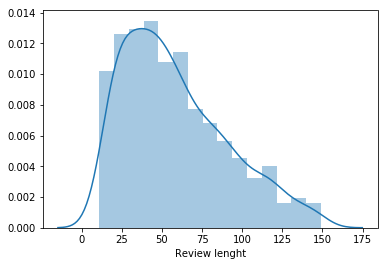

In [552]:
sns.distplot(data['Review lenght'])

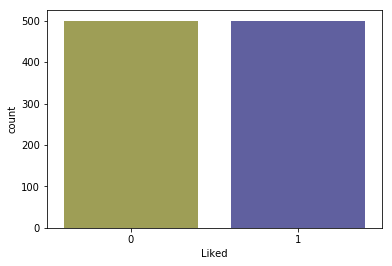

In [553]:
sns.countplot(data['Liked'],palette='gist_stern_r')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FC6CE95F8>,
      dtype=object)

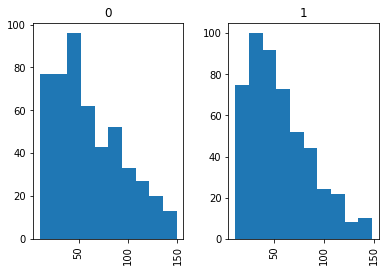

In [554]:
data.hist(column='Review lenght',by='Liked')

In [555]:
#string.puntuation method
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [556]:
data.head()

,Review,Liked,Review lenght
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [557]:
#removing the punctuations with string.puntuation method
for i in data['Review']:
    if ( i not in string.punctuation):
        print(data['Review'])
    else:
       

SyntaxError: unexpected EOF while parsing (<ipython-input-557-6ceef5b6bbd4>, line 6)

In [558]:
mess = 'Sample message! Notice: it has punctuation.'
nopunc=[]
for i in mess:
    if(i not in string.punctuation):
        nopunc.append(i)
       

In [559]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [560]:
nopunc=''.join(nopunc)

In [561]:
nopunc

'Sample message Notice it has punctuation'

In [562]:
p=nopunc.split()
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [563]:
from nltk.corpus import stopwords

In [564]:
k=[]
for i in p:
    if(i.lower() not in stopwords.words('english')):
        k.append(i)

In [565]:
k=''.join(k)
k

'SamplemessageNoticepunctuation'

In [566]:
#join all the above to create a function
def text_preprocessing(mess):
    nopunc=[]
    for i in mess:
        if(i not in string.punctuation):
            nopunc.append(i)
    nopunc=''.join(nopunc)
    p=nopunc.split()
    k=[]
    for i in p:
        if(i.lower() not in stopwords.words('english')):
            k.append(i)
    k=''.join(k)
    return k.lower()

    
    
       

In [567]:
#function using list comprehesions
"""def text_process(mess):
    nopunc = [i for i in mess if i not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [i for i in nopunc.split() if i.lower() not in stopwords.words('english')]"""

"def text_process(mess):\n    nopunc = [i for i in mess if i not in string.punctuation]\n    nopunc = ''.join(nopunc)\n    return [i for i in nopunc.split() if i.lower() not in stopwords.words('english')]"

In [568]:
f='praneeth MEtuku is a the good boy!@'
o=text_preprocessing(f)
o

'praneethmetukugoodboy'

In [569]:
data['Review'].head().apply(text_preprocessing)

0                                        wowlovedplace
1                                            crustgood
2                                    tastytexturenasty
3    stoppedlatemaybankholidayricksteverecommendati...
4                             selectionmenugreatprices
Name: Review, dtype: object

In [570]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [571]:
#new stemming function
def text_preprocessing(mess):
    nopunc=[]
    for i in mess:
        if(i not in string.punctuation):
            nopunc.append(i)
    nopunc=''.join(nopunc)
    p=nopunc.split()
    k=[]
    for i in p:
        if(i.lower() not in stopwords.words('english')):
            k.append(ps.stem(i))
    k=' '.join(k)
    return k.lower()

In [572]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [573]:
mess='Hey tHe loved bunny for worked so hard'
text_process(mess)

['Hey', 'loved', 'bunny', 'worked', 'hard']

In [574]:
data['Review'].head(5).apply(text_process)

0                                  [Wow, Loved, place]
1                                        [Crust, good]
2                              [tasty, texture, nasty]
3    [Stopped, late, May, bank, holiday, Rick, Stev...
4                     [selection, menu, great, prices]
Name: Review, dtype: object

In [575]:
data.head()

,Review,Liked,Review lenght
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [520]:
#bag of words model
#sparsity
#sparse matrix
#tokenization

In [576]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer().fit(data['Review'].values.astype(str))

In [577]:
print(len(cv.vocabulary_))

2035


In [578]:
Review_bag=cv.transform(data['Review'])

In [579]:
y=data['Liked']

In [580]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=12)

In [581]:
from sklearn.ensemble import RandomForestClassifier
nb=RandomForestClassifier()
nb.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [582]:
y_pred=nb.predict(x_test)

In [583]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [584]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[  1 174]
 [  0 159]]


In [585]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       1.00      0.01      0.01       175
          1       0.48      1.00      0.65       159

avg / total       0.75      0.48      0.31       334



In [586]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_pred)
print(accuracy_test)

0.47904191616766467
